In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.stats as stats
import pymannkendall as mk


data = xr.open_dataset("chirps-v2_monthly_africa_2.5.nc",engine='netcdf4')

In [8]:
def SPI_function(data):
    cumulative_data = data.rolling(time=12).sum(skipna=True)
    
    mean = cumulative_data.mean(dim='time')
    std = cumulative_data.std(dim='time')
    
    spi = (cumulative_data - mean) / std
    
    return spi


In [9]:
SPI = SPI_function(data['precip'])

In [4]:
First_period = slice('1980-01','2000-12')
Second_period = slice('2000-01','2020-12')

spi_1980_2000 = SPI.sel(time=First_period).mean('time')
spi_2000_2020 = SPI.sel(time=Second_period).mean('time')

In [5]:
Difference_btn_SPI = spi_2000_2020 - spi_1980_2000

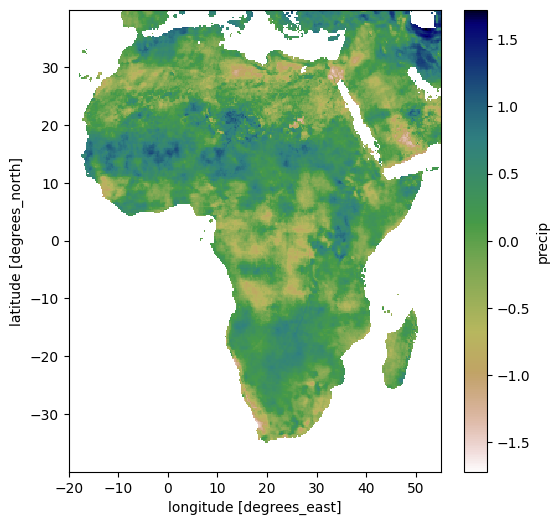

In [6]:
plt.figure(figsize=(6,6))
Difference_btn_SPI.plot(cmap="gist_earth_r")
plt.show()

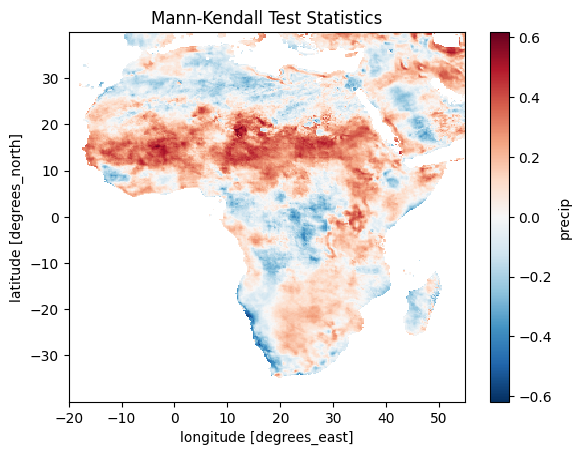

In [10]:
def mann_kendall_test(data, alpha=0.05):
    try:
        result = mk.original_test(data, alpha=alpha)
        return result.Tau
    except ZeroDivisionError:
        return np.nan

mk_ = xr.apply_ufunc(
    mann_kendall_test,
    SPI,
    input_core_dims=[['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    output_dtypes=['float64']
)

mk_.plot()
plt.title('Mann-Kendall Test Statistics')
plt.show()


Results Description:The map shows that rainfall trends in the sahara regions and East of  Africa are increasing.There is a tendency for precipitation to increase as you move east across Africa. Some regions in the south of Africa are also likely to experience decreased rainfall trends as well.